In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv("/content/employee_data.csv")
df

,emp_id,full_name,age,gender,department,salary,join_date,exp_years,emp_status
0,101,John A. Smith,28.0,male,Sales,45000.0,2017-08-19,5.0,permanent
1,102,Sarah-Louise James,NaN,female,Marketing,50000.0,2018-11-03,NaN,permanent
2,110,Rajesh Kumar,45.0,male,Sales,90000.0,2010-02-23,14.0,permanent
3,103,Mark O'Donnell,35.0,male,HR,52000.0,2016-03-11,8.0,NaN
4,104,Emily Jackson-Smith,29.0,female,R&D,65000.0,NaN,6.0,contract
5,102,Sarah-Louise James,NaN,female,Marketing,50000.0,2018-11-03,NaN,permanent
6,110,Rajesh Kumar,45.0,male,Sales,90000.0,2010-02-23,14.0,permanent
7,105,Samuel L. Jackson,42.0,Male,IT,NaN,2015-07-01,12.0,permanent
8,106,Priya Ghosh,31.0,NaN,Marketing,58000.0,2019-01-10,4.0,contract
9,102,Sarah-Louise James,NaN,female,Marketing,50000.0,2018-11-03,NaN,permanent


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   emp_id      16 non-null     int64  
 1   full_name   16 non-null     object 
 2   age         12 non-null     float64
 3   gender      15 non-null     object 
 4   department  16 non-null     object 
 5   salary      15 non-null     float64
 6   join_date   15 non-null     object 
 7   exp_years   11 non-null     float64
 8   emp_status  15 non-null     object 
dtypes: float64(3), int64(1), object(5)
memory usage: 1.3+ KB


In [30]:
# Check Missing Values
df.isnull().sum()

,0
emp_id,0
full_name,0
age,4
gender,1
department,0
salary,1
join_date,1
exp_years,5
emp_status,1


In [31]:
# Handle Missing Age
df['age'].fillna(df['age'].median(), inplace=True)

/tmp/ipython-input-2116147459.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


In [32]:
# Handle Missing Experience
df['exp_years'].fillna(df['exp_years'].median(), inplace=True)

/tmp/ipython-input-673349935.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['exp_years'].fillna(df['exp_years'].median(), inplace=True)


In [33]:
# Handle Missing Employee Status
df['emp_status'].fillna('permanent', inplace=True)

/tmp/ipython-input-542583483.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['emp_status'].fillna('permanent', inplace=True)


In [34]:
# Handle Missing Join Date
df['join_date'] = pd.to_datetime(df['join_date'])
df['join_date'].fillna(df['join_date'].mode()[0], inplace=True)

/tmp/ipython-input-269133932.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['join_date'].fillna(df['join_date'].mode()[0], inplace=True)


In [35]:
# Standardize Gender Column
df['gender'] = df['gender'].str.lower()

In [36]:
# Remove Duplicate Records
df.drop_duplicates(inplace=True)

In [37]:
# convert into integer datatype (object --> integer)
df['age']=df['age'].astype(int)

In [38]:
df['exp_years']=df['exp_years'].astype(int)

In [40]:
df['salary']=df['salary'].fillna(df['salary'].median())
df['salary']=df['salary'].astype(int)

In [41]:
df['gender']=df['gender'].fillna(df['gender'].mode()[0])

In [42]:
df.sort_values(by="emp_id",inplace=True)

In [43]:
df.reset_index(inplace=True)

In [44]:
df.drop("index",axis=1,inplace=True)

In [45]:
# Extract Year of Joining
df['join_year'] = df['join_date'].dt.year

In [46]:
# Salary Category
def salary_category(sal):
  if sal < 50000:
    return 'Low'
  elif sal <= 80000:
    return 'Medium'
  else:
    return 'High'

df['salary_category'] = df['salary'].apply(salary_category)

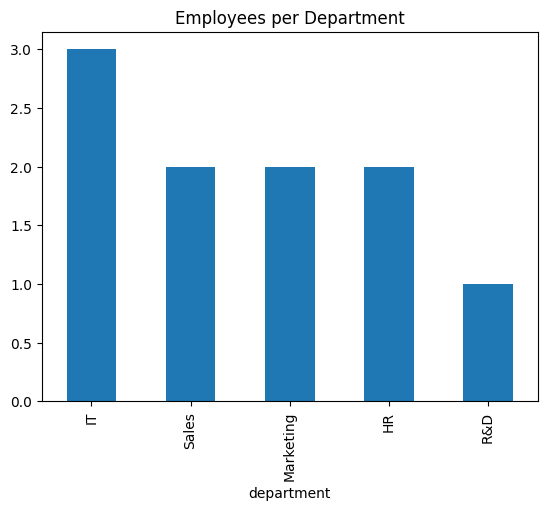

In [47]:
# Department Wise Employee Count

df['department'].value_counts()

plt.figure()
df['department'].value_counts().plot(kind='bar')
plt.title('Employees per Department')
plt.show()

In [51]:
# Average Salary by Department
df.groupby('department')['salary'].mean().sort_values(ascending=False)

,salary
department,
Sales,67500.000000
R&D,65000.000000
IT,61666.666667
Marketing,54000.000000
HR,50000.000000


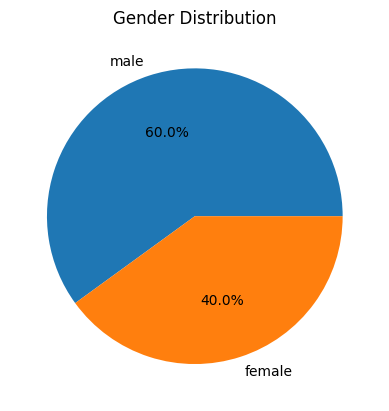

In [52]:
# Gender Distribution
df['gender'].value_counts()

plt.figure()
df['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

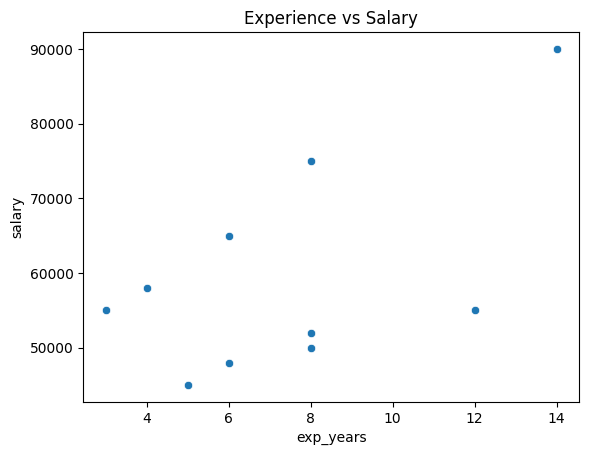

In [53]:
# Experience vs Salary
plt.figure()
sns.scatterplot(x='exp_years', y='salary', data=df)
plt.title('Experience vs Salary')
plt.show()

In [68]:
df.to_csv('cleaned_employee_data.csv', index=False)
df

,emp_id,full_name,age,gender,department,salary,join_date,exp_years,emp_status,join_year,salary_category
0,101,John A. Smith,28,male,Sales,45000,2017-08-19,5,permanent,2017,Low
1,102,Sarah-Louise James,37,female,Marketing,50000,2018-11-03,8,permanent,2018,Medium
2,103,Mark O'Donnell,35,male,HR,52000,2016-03-11,8,permanent,2016,Medium
3,104,Emily Jackson-Smith,29,female,R&D,65000,2010-02-23,6,contract,2010,Medium
4,105,Samuel L. Jackson,42,male,IT,55000,2015-07-01,12,permanent,2015,Medium
5,106,Priya Ghosh,31,male,Marketing,58000,2019-01-10,4,contract,2019,Medium
6,107,Susan M. Thompson,39,female,IT,75000,2014-09-21,8,permanent,2014,Medium
7,108,Brian P. McDonald,33,male,HR,48000,2017-04-15,6,permanent,2017,Low
8,109,Sophia Y. Richardson,26,female,IT,55000,2020-05-30,3,contract,2020,Medium
9,110,Rajesh Kumar,45,male,Sales,90000,2010-02-23,14,permanent,2010,High


In [ ]:
# Business Insights :

# - Sales department has the highest number of employees

# - Employees with higher experience earn higher salaries

# - Majority employees are permanent

# - High salary employees are mostly from Sales & R&D